<a href="https://colab.research.google.com/github/GoularteVinicius/ImersaoDadosAlura/blob/main/Desafios_Imers%C3%A3o_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafios Aula 01
Inicialmente farei os passos iniciais para importação do dataset para poder trabalhar com as perguntas propostas.

###Importação de dados
Realizada como apresentada na aula.


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

# comando para a importacao do pacote pandas (excencial na manipulacao de datasets)

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
#um recurso muito interessante do pandas é buscar dados através de urls como faremos a seguir

dados = pd.read_csv(url_dados, compression = 'zip') 
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

## Desafio 01: Investigar por que a classe tratamento é tão desbalanceada?
Por familiariadade com a área - já realizei experimentos em cultura de células, a fim de verificar resposta celular- esse desafio me pareceu de simples resolução. Porém preciso demonstrar estes conceitos que tenho em minha mente através dos dados, corroborando minha hipotese (ou não).

A minha hipotese inicial está relacionada ao desenho experimental para obtenção dos dados. Se realizássemos um experimento com 5 drogas diferentes, em 3 periodos, com 2 doses, chegamos ao número de 30 combinações possiveis. Ao passo que um grande experimento como este, só necessitaria de um controle para cada uma das condições de tempo e dose. Logo, temos 30 experimentos com droga, e mais 6 controles.

Contudo, voltemos aos dados. Algo que me chamou a atenção de cara ao atacar o desafio foi a disparidade entre as drogas testadas. Porém essa disparidade passou a fazer mais sentido ao observar qual era a droga referida nos experimentos 'com controle'. 


In [ ]:
print('Contagem das drogas em números absolutos')
print(dados['droga'].value_counts())
print('Contagem das drogas em proporção')
dados['droga'].value_counts(normalize=True)

Contagem das drogas em números absolutos
cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
b6b4f212d       1
5cc5a5a19       1
6e2b418c3       1
809527b9d       1
e3fe7b417       1
Name: droga, Length: 3289, dtype: int64
Contagem das drogas em proporção


cacb2b860    0.078357
87d714366    0.030150
9f80f3f77    0.010330
8b87a7a83    0.008524
5628cb3ee    0.008482
               ...   
b6b4f212d    0.000042
5cc5a5a19    0.000042
6e2b418c3    0.000042
809527b9d    0.000042
e3fe7b417    0.000042
Name: droga, Length: 3289, dtype: float64

In [ ]:
df_controle=dados.query('tratamento == "com_controle"')
df_controle['droga'].unique()

array(['cacb2b860'], dtype=object)

Note, por tanto, que a droga `cacb2b860` é o nosso controle, e assim, a mais testada entre todas as demais. Algo que parecia dispar, e o grupo controle parecia ter tão menos amostras do que os grupos experimentais, notamos que não é esse o caso. Na verdade, a maior fatia dos experimentos (7,8%) foi realizada com controle, em que dentro de cada desenho experimental deveria servir como controle para uma dezena de outras drogas testadas em paralelo.


In [ ]:
df_droga = dados.query('tratamento == "com_droga"') #variavel com a droga

In [ ]:
#proporções por tempo
print("Proporção de testes por tempo de experimento no controle")
print(df_controle['tempo'].value_counts(normalize=True))
print("Proporção de testes por tempo de experimento no droga")
print(df_droga['tempo'].value_counts(normalize=True))


Proporção de testes por tempo de experimento no controle
48    0.347267
72    0.327974
24    0.324759
Name: tempo, dtype: float64
Proporção de testes por tempo de experimento no droga
48    0.346364
72    0.327137
24    0.326499
Name: tempo, dtype: float64


In [ ]:
#proporções por dose
print("Proporção de testes por dose de experimento no controle")
print(df_controle['dose'].value_counts(normalize=True))
print("Proporção de testes por dose de experimento no droga")
print(df_droga['dose'].value_counts(normalize=True))

Proporção de testes por dose de experimento no controle
D1    0.509646
D2    0.490354
Name: dose, dtype: float64
Proporção de testes por dose de experimento no droga
D1    0.510115
D2    0.489885
Name: dose, dtype: float64


In [ ]:
countsdados=dados['droga'].value_counts()
#plt.bar(countsdados.keys, countsdados.values)
countsdados.keys


<bound method Series.keys of cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
b6b4f212d       1
5cc5a5a19       1
6e2b418c3       1
809527b9d       1
e3fe7b417       1
Name: droga, Length: 3289, dtype: int64>

##Desafio 02: Plotar as 5 últimas linhas da tabela
Para isso, assim como mostrado na aula, podemos usar um método similar ao .head(); o método .tail()


In [ ]:
dados.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


##Desafio 03: Proporção das classes tratamento.
Similar ao realizado no desafio 01 para observar proporções no grupo controle e experimental.

In [ ]:
dados['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

##Desafio 04: Quantos tipos de droga foram investigados

Passamos por essa questão no Desafio 01 também. Como discutimos, uma das drogas apresentada na coluna  `droga` é relativa ao experimento controle. Assim, pegamos o total de drogas testadas, com o comprimento do vetor de valores unicos da coluna `droga`.

In [ ]:
len(dados['droga'].unique())


3289

Ao todo são 3289 drogas, sendo que uma delas não necessariamente foi investigada, pois foi usada como controle.

Uma das caracteristicas de um experimento com controle é saber exatamente os efeitos desta droga a fim de comparação.

##Desafio 05: Procurar na documentação o método query(pandas). 
Realiza o mesmo subseting que o uso das chaves realiza, porém de maneira mais computacionalmente eficaz. A sintaxe é um pouco diferente mas ainda assim compreensivel, como explorado no desafio 01

In [ ]:
?dados.query

##Desafio 06: Renomear as colunas tirando o hífen.
Acessamos as colunas com o método .columns, em seguida com o método .str indicamos strings, e .replace para a alteração do hífen por um espaço vazio.

In [ ]:
dados.columns = dados.columns.str.replace("-", "")
dados.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


##Desafio 07: Deixar os gráficos bonitões.
Utilizando como base os graficos gerados ao longo da aula e aprefeiçoando a visualização.
Estudando um pouco as formas de visualização através da biblioteca matplotlib.pyplot, notei algo parecido com ggplot2 implementado na linguagem R a qual tenho mais familiariadade e experiência. Podemos mapear e passar instruções desde o primeiro plot, porém é possível realizar alterações com os devidos métodos após o primeiro plot.


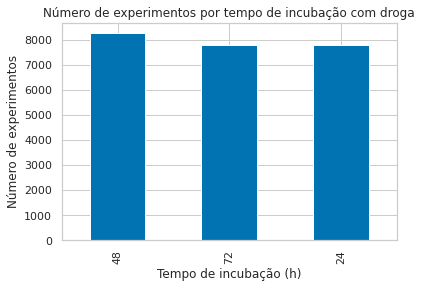

In [ ]:
#primeira forma (sintáxe)
dados['tempo'].value_counts().plot.bar(title = "Número de experimentos por tempo de incubação com droga",
                                       xlabel= "Tempo de incubação (h)", ylabel="Número de experimentos")


(Text(0.5, 0, 'Tempo de incubação (h)'),
 Text(0, 0.5, 'Número de experimentos'))

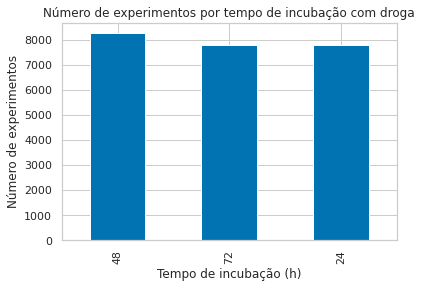

In [ ]:
#segunda forma (sintáxe)
dados['tempo'].value_counts().plot.bar()
plt.title("Número de experimentos por tempo de incubação com droga")
plt.xlabel("Tempo de incubação (h)"),plt.ylabel("Número de experimentos")


##Desafio 08 | Conclusões
Pudemos observar pontos centrais nesse conjunto de dados:
*   Temos uma grande base de dados contendo experimento com drogas e seu efeito na expressão genica (colunas `g-#`).
 * A expressão genica é dada por um número normalizado dentro do conjunto de dados.  Pelo meu conhecimento prévio, sei que normalizações baseadas em diferenças logaritimicas relativas são comuns nesse tipo de experimento.
 * não está claro o que as colunas `c-#` querem dizer.
*   A disparidade observada a principio para o grupo controle em relação aos grupos experimentais "com droga" pode ser explicada por uma questão de desenho experimental:
 * Pode testar multiplas drogas contando com a presença de apenas um controle para cada uma das condições testadas. 
 * Por fim, comparando com o número de experimentos para cada droga, o número de experimentos controle é maior que todos, o que concede robustez as comparações.
 



#Desafios Aula 02


##Importações e manipulações realizadas na Aula 02

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)
cod_compostos = dados['composto'].value_counts().index[0:5]

##Desafio 01: Ordenar o gráfico countplot

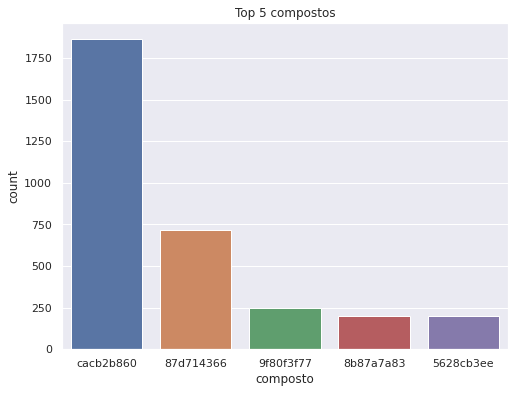

In [ ]:
sns.set()
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'),
                   order=cod_compostos)
ax.set_title('Top 5 compostos')
plt.show()

##Desafio 02: Melhorar a visualização alterando tamanho da fonte...

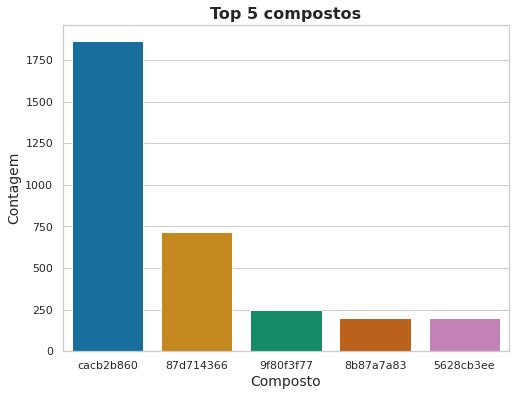

In [ ]:
sns.set()
sns.set_theme(style='whitegrid', palette='colorblind' )

plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'),
                   order=cod_compostos)
ax.set_title('Top 5 compostos', fontsize=16, weight='bold')
ax.set_xlabel('Composto', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14 )

plt.show()

##Desafio 03: Plotar os histogramas com seaborn


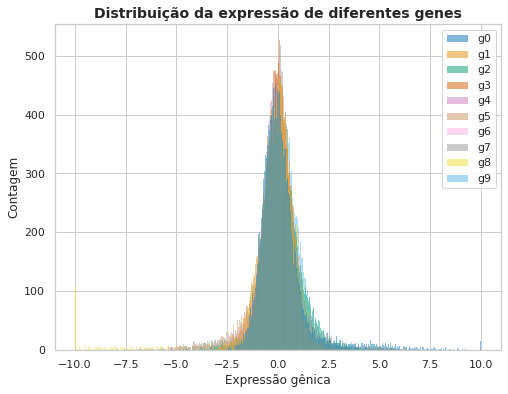

In [ ]:
sns.set()
sns.set_theme(style='whitegrid', palette='colorblind' )

plt.figure(figsize=(8, 6))

ax=sns.histplot(data= dados.loc[:,'g0':'g9'], alpha= 0.5)
ax.set_title('Distribuição da expressão de diferentes genes', fontsize=14, weight='bold')
ax.set_xlabel('Expressão gênica', fontsize=12)
ax.set_ylabel('Contagem', fontsize=12 )

plt.show()

##Desafio 04: Estudar sobre as estatíticas retornadas no .describe()
O método .describe() apresenta a estatísticas mais claras como contagem, mínimo e máximo. Porém também é apresentada a média aritimetica `mean`, e o desvio padrão `std`. Bem como os percentis de 25%, 50% (mediana) e 75%.


> Percentis são divisões ordenadas das amostras.
> * 25º percentil determina os 25% menores dos dados
> * 75º percentil determina os 75% menores dos dados



In [ ]:
?dados.describe()

##Desafio 05: Refletir sobre a manipulação do tamanho das visualizações. 
A depender da visualização, e principalmente em casos onde um gráfico possui muitos pontos, é necessário ampliar e ajustar proporções do gráfico para seja possível obter uma boa ilustração dos dados.


##Desafio 06: Fazer outras análises com o boxplot e até com o histograma. 


###Box plot de um determinado gene para as 5 drogas mais usadas

Text(0, 0.5, 'Expressão genica de g0')

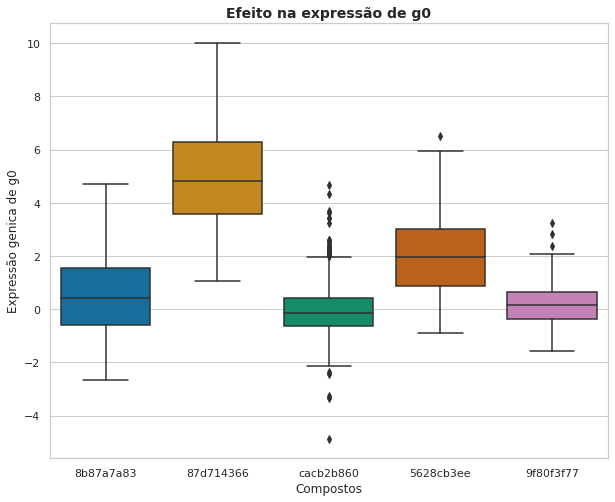

In [ ]:
plt.figure(figsize=(10,8))
dados_alt=dados.query('composto in @cod_compostos')
dados_alt['composto'].unique()
ax=sns.boxplot(y='g0', x='composto' , data=dados_alt)
ax.set_title('Efeito na expressão de g0', fontsize=14, weight='bold')
ax.set_xlabel('Compostos', fontsize=12)
ax.set_ylabel('Expressão genica de g0', fontsize=12 )


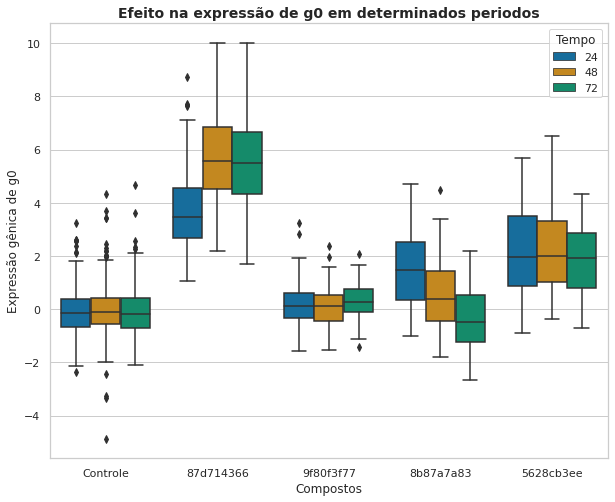

In [ ]:
plt.figure(figsize=(10,8))
dados_alt=dados.query('composto in @cod_compostos')
dados_alt['composto'].unique()
ax=sns.boxplot(y='g0', x='composto', hue = 'tempo' , data=dados_alt,
               order=cod_compostos)
ax.set_title('Efeito na expressão de g0 em determinados periodos', fontsize=14, weight='bold')
ax.set_xlabel('Compostos', fontsize=12)
ax.set_ylabel('Expressão gênica de g0', fontsize=12 )
ax.legend(title='Tempo')
ax.set_xticklabels(['Controle','87d714366','9f80f3f77','8b87a7a83','5628cb3ee'])

plt.show()


###Distribuição comparando o controle com a droga `87d714366`

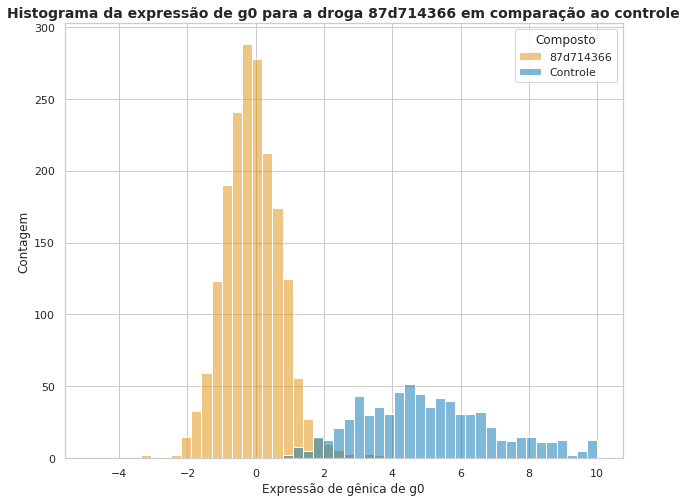

In [ ]:
drg=['87d714366', 'cacb2b860']
plt.figure(figsize=(10,8))

ax=sns.histplot(dados.query('composto in @drg'), x="g0", hue="composto", bins=50)
ax.set_title('Histograma da expressão de g0 para a droga 87d714366 em comparação ao controle',fontsize=14, weight='bold' )
ax.set_xlabel('Expressão de gênica de g0', fontsize=12)
ax.set_ylabel('Contagem', fontsize=12 )
ax.legend(title="Composto", labels=('87d714366','Controle' ))
plt.show()



###Desafio 07 | Conclusão
Com estas novas análises pudemos ver que é possivel explorar diferenças na expressão gênica de genes de interesse, e comparar seus efeitos a depender da droga utilizada. Foram observadas diferenças no efeito a depender da droga e seu tempo de aplicação.

Ao observar simplemente controle x tratado, não temos dimensão da diferença que uma molecula pode causar na expressão de um gene. Porém ao fazer recortes menores vemos uma tendencia mais caracteristica de cada tratamento. Chama a atenção, por exemplo, a droga `87d714366`, que tem uma média e distribuição muito distinta do controle. Para verificar se essa diferença é realmente significativa, seria necessaria aplicação de um teste estatistico (como teste t).

É importante observar, como é inviavel verificar gene a gene, droga a droga sem algum direcionamento, com as técnicas até então aprendidas. Em minha experiencia, tradicionalmente temos acesso a uma quantidade muito menor de experimentos, e com um conhecimento previo a respeito das moleculas testadas, então testamos hipoteses de forma mais direta.

#Desafios Aula 03


##Desafio 01: Criar tabelas de frequência com pandas.groupby()

In [ ]:
dados.groupby(by= ['tratamento', 'tempo', 'dose']).count()

id  composto    g0    g1  ...   c96   c97   c98   c99
tratamento   tempo dose                              ...                        
com_controle 24    D1     301       301   301   301  ...   301   301   301   301
                   D2     305       305   305   305  ...   305   305   305   305
             48    D1     343       343   343   343  ...   343   343   343   343
                   D2     305       305   305   305  ...   305   305   305   305
             72    D1     307       307   307   307  ...   307   307   307   307
                   D2     305       305   305   305  ...   305   305   305   305
com_droga    24    D1    3585      3585  3585  3585  ...  3585  3585  3585  3585
                   D2    3581      3581  3581  3581  ...  3581  3581  3581  3581
             48    D1    4011      4011  4011  4011  ...  4011  4011  4011  4011
                   D2    3591      3591  3591  3591  ...  3591  3591  3591  3591
             72    D1    3600      3600  3600  3600  ...  3600  3600  3600  3600
                   D2    3580      3580  3580  3580  ...  3580  3580  3580  3580

[12 rows x 874 columns]

In [ ]:
dados.groupby(by= ['tratamento', 'tempo', 'dose'], ).mean()

g0        g1  ...       c98       c99
tratamento   tempo dose                      ...                    
com_controle 24    D1   -0.251760 -0.453322  ...  0.350566  0.342308
                   D2    0.010754 -0.229451  ...  0.134107  0.112021
             48    D1   -0.122773 -0.453638  ...  0.408657  0.450673
                   D2    0.013174  0.001737  ...  0.232461  0.169539
             72    D1   -0.295271 -0.669059  ...  0.379652  0.319684
                   D2    0.070250  0.133537  ...  0.200942  0.165440
com_droga    24    D1    0.367996 -0.170839  ... -0.340809 -0.216371
                   D2    0.115253 -0.081764  ... -0.254499 -0.187848
             48    D1    0.412469 -0.142581  ... -0.634006 -0.389838
                   D2    0.214480 -0.001143  ... -0.485368 -0.317882
             72    D1    0.286250 -0.127878  ... -0.835132 -0.588545
                   D2    0.253439  0.052840  ... -0.644784 -0.391018

[12 rows x 872 columns]

##Desafio 02: Normalizar o crosstab pela coluna.
Para realizar esse desafio, basta realizar a troca do argumento passado para o `normalize`.

Da documentação:


> normalize : bool, {‘all’, ‘index’, ‘columns’}, or {0,1}, default False
Normalize by dividing all values by the sum of values.
* If passed ‘all’ or True, will normalize over all values.
* If passed ‘index’ will normalize over each row.
* If passed ‘columns’ will normalize over each column.
* If margins is True, will also normalize margin values.



In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'],
            normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

##Desafio 03: Explorar outros agregadores

Podemos usar alguns agregadores (funções) conhecidos como minimo, maximo, mediana desvio padrão e variancia.
A rigor, toda função que é aplicada a um array numerico poderia ser usada, inclusive funções criadas.


In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],
            dados['tratamento'], values=dados['g0'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],
            dados['tratamento'], values=dados['g0'], aggfunc='max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],
            dados['tratamento'], values=dados['g0'], aggfunc='var')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.564594   2.137311
     48         0.728284   2.869308
     72         0.591814   2.127514
D2   24         0.699943   1.092022
     48         0.700310   1.730477
     72         0.770956   2.106944

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],
            dados['tratamento'], values=dados['g0'], aggfunc='median')

tratamento  com_controle  com_droga
dose tempo                         
D1   24          -0.2912    0.02700
     48          -0.2145    0.01620
     72          -0.3655    0.02615
D2   24           0.0096   -0.02610
     48          -0.0506   -0.02960
     72           0.0528    0.00015

##Desafio 04: Explorar o melt.

O melt desconstroi o data frame em rows e as colunas são transformadas em rows separados. essa função é util para diversos sentidos em que se necessite das variaveis separadas em rows.



In [72]:
pd.melt(dados, id_vars=['dose', 'tempo'])

,dose,tempo,variable,value
0,D1,24,id,id_000644bb2
1,D1,72,id,id_000779bfc
2,D1,48,id,id_000a6266a
3,D1,48,id,id_0015fd391
4,D2,72,id,id_001626bd3
...,...,...,...,...
20837245,D2,24,c99,0.468
20837246,D2,24,c99,0.3689
20837247,D2,48,c99,0.3808
20837248,D1,24,c99,0.074


##Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos. 


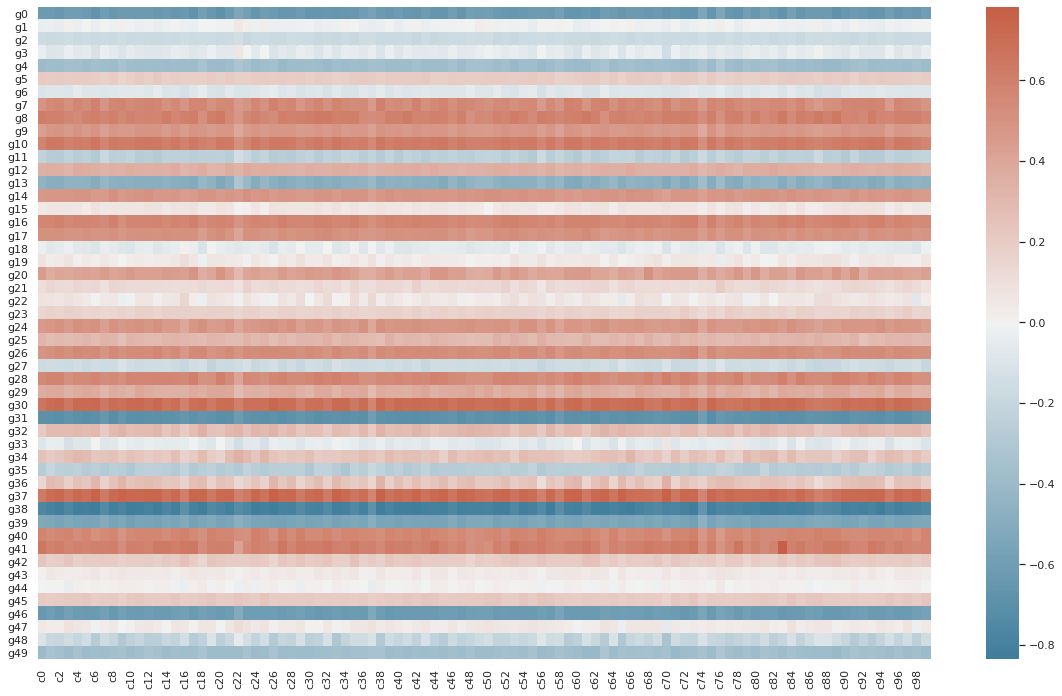

In [103]:
cg=pd.concat([dados.loc[:,'g0':'g49'],dados.loc[:,'c0':'c99']],
             axis=1).corr().loc['g0':'g49', 'c0':'c99']
plt.figure(figsize=(20, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cg, cmap=cmap, center=0)


Nesse plot podemos o ver que se a expressão de um gene é alterada para um tipo celular, também será afetada nos demais tipos celulares.

Essa correlação é particularmente interessante, pois, fortes correlação positivas ou negativas tem um significado biologico interessante. Uma correlação positiva por exemplo de um gene e um tipo celular, significa que a maior expressão dele se relaciona a uma maior viabilidade do tipo celular.

##Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

No caso usado de heatmap par a par, usamos uma mascara com uma matriz, e assim os resultados da diagonal superior não são mostrados. A função de plot recebe essa mascara para não mostra-los.

##Desafio 07: Resumo do que você aprendeu com os dados
Pude aprender um pouco mais sobre a caracteristica dos dados utilizando as crosstab e groupby. São função muito uteis nas para avaliar caracteristicas do dataset.

Além disso, verificar correlações mostra-se muito util ao entender relações entre  os genes ou viabilidade de tipos celulares. Essa ferramenta é muito util para ter uma ideia dos efeitos dos compostos na expressão de diferentes genes e como eles podem estar relacionados entre si.